In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
latency_cols = ["start", "end", "id", "start_ts", "arrival"]
ref_col = "start_ts"

waitTime = "100"
loc = "datasets/NES/101123/1sec_8_200_3w_p"

bottom_up_no_stress_dir_monitoring = loc + "/bottom_up_no_4x800M_100.csv"
bottom_up_stress_dir_monitoring = loc + "/bottom_up_all_4x800M_100.csv"

top_down_no_stress_dir_monitoring = loc + "/top_down_no_4x800M_100.csv"
top_down_stress_dir_monitoring = loc + "/top_down_all_4x800M_100.csv"

nemo_no_stress_dir_monitoring = loc + "/nemo_no_4x800M_100.csv"
nemo_stress_dir_monitoring = loc + "/nemo_all_4x800M_100.csv"

mst_no_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceMst/bottomUpWithMonitoringSourceMst.out"
mst_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceMst_stressed/bottomUpWithMonitoringSourceMst.out"

chain_no_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceChain/bottomUpWithMonitoringSourceChain.out"
chain_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceChain_stressed/bottomUpWithMonitoringSourceChain.out"

bottom_up_no_stress_dir_debs = loc + "/bottomUpDebsThreeLevel/bottomUpDebsThreeLevel_tumbling_1_32000_200.out"
top_down_no_stress_dir_debs = loc + "/topDownDebsThreeLevel/topDownDebsThreeLevel_tumbling_1_32000_200.out"
nemo_no_stress_dir_debs = loc + "/nemoDebsThreeLevel/nemoDebsThreeLevel_tumbling_1_32000_200.out"

bottom_up_stress_dir_debs = loc + "/bottomUpDebsThreeLevel_stress/bottomUpDebsThreeLevel_tumbling_1_32000_200.out"
top_down_stress_dir_debs = loc + "/topDownDebsThreeLevel_stress/topDownDebsThreeLevel_tumbling_1_32000_200.out"
nemo_stress_dir_debs = loc + "/nemoDebsThreeLevel_stress/nemoDebsThreeLevel_tumbling_1_32000_200.out"

measurements = {
    #"mst": mst_no_stress_dir,
    #"mst stress": mst_stress_dir,
    #"chain": chain_no_stress_dir,
    #"chain stress": chain_stress_dir,
    "top-down": top_down_no_stress_dir_debs,
    "top-down stress": top_down_stress_dir_debs,
    "bottom-up": bottom_up_no_stress_dir_debs,
    "bottom-up stress": bottom_up_stress_dir_debs,
    "nemo": nemo_no_stress_dir_debs,
    "nemo stress": nemo_stress_dir_debs
}

color_list = sns.color_palette(n_colors=len(measurements))
color_dict = {}
i = 0
for k in measurements.keys():
    color_dict[k] = color_list[i]
    i = i + 1

# this dict contains the latency measurements of each approach
latency_results = {}
runtimes = {}

## Latency

In [27]:
for k, m_loc in measurements.items():
    print(k, m_loc)
    df = pd.read_csv(m_loc, skiprows=1, names=latency_cols)
    df["latency"] = df["arrival"] - df["start_ts"]
    # df = df[df["latency"] > 0]
    print(df[df["latency"] <= 0]["latency"].count())
    latencies = df["latency"].to_list()
    latency_results[k] = latencies
    runtimes[k] = df["arrival"].max() - df["start_ts"].min()

top-down datasets/NES/101123/1sec_8_200_3w_p/topDownDebsThreeLevel/topDownDebsThreeLevel_tumbling_1_32000_200.out
0
top-down stress datasets/NES/101123/1sec_8_200_3w_p/topDownDebsThreeLevel_stress/topDownDebsThreeLevel_tumbling_1_32000_200.out
0
bottom-up datasets/NES/101123/1sec_8_200_3w_p/bottomUpDebsThreeLevel/bottomUpDebsThreeLevel_tumbling_1_32000_200.out
0
bottom-up stress datasets/NES/101123/1sec_8_200_3w_p/bottomUpDebsThreeLevel_stress/bottomUpDebsThreeLevel_tumbling_1_32000_200.out
0
nemo datasets/NES/101123/1sec_8_200_3w_p/nemoDebsThreeLevel/nemoDebsThreeLevel_tumbling_1_32000_200.out
0
nemo stress datasets/NES/101123/1sec_8_200_3w_p/nemoDebsThreeLevel_stress/nemoDebsThreeLevel_tumbling_1_32000_200.out
0


In [28]:
df

,start,end,id,start_ts,arrival,latency
0,10634000,10635000,54,1699892239045,1699892239563,518
1,10634000,10635000,63,1699892239101,1699892239563,462
2,10634000,10635000,24,1699892239126,1699892239653,527
3,10634000,10635000,47,1699892239061,1699892239653,592
4,10634000,10635000,100,1699892239161,1699892239769,608
...,...,...,...,...,...,...
3436,11216000,11217000,54,1699892538217,1699892539124,907
3437,11218000,11219000,24,1699892534206,1699892539203,4997
3438,11218000,11219000,47,1699892538309,1699892539203,894
3439,11217000,11218000,63,1699892515452,1699892539679,24227


In [29]:
runtimes

{'top-down': 300913,
 'top-down stress': 300572,
 'bottom-up': 302155,
 'bottom-up stress': 301631,
 'nemo': 302119,
 'nemo stress': 300634}

top-down 8159
top-down stress 3310
bottom-up 8891
bottom-up stress 3529
nemo 8460
nemo stress 3441


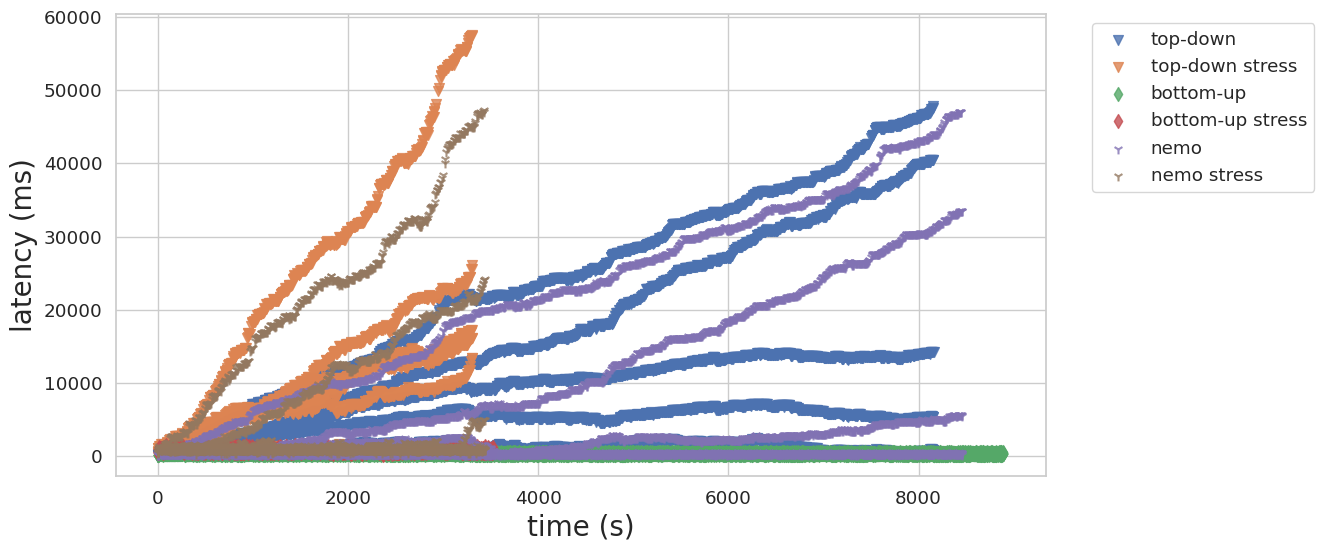

In [30]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(12, 6))

i = 1
for k, v in latency_results.items():
    print(k, len(v))
    if k.startswith("nemo"):
        marker = "1"
    elif k.startswith("bottom"):
        marker = "d"
    else:
        marker = "v"
        
    ax.scatter([i for i in range(len(v))], v, label=k, s=50, alpha=0.8, marker=marker, color=color_dict[k])
    i = i + 1

# set the axis labels and title
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('latency (ms)', fontsize=20)

# Set the legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# show the plot
# plt.title('Latency/tuple (80 events/s)')
plt.show()

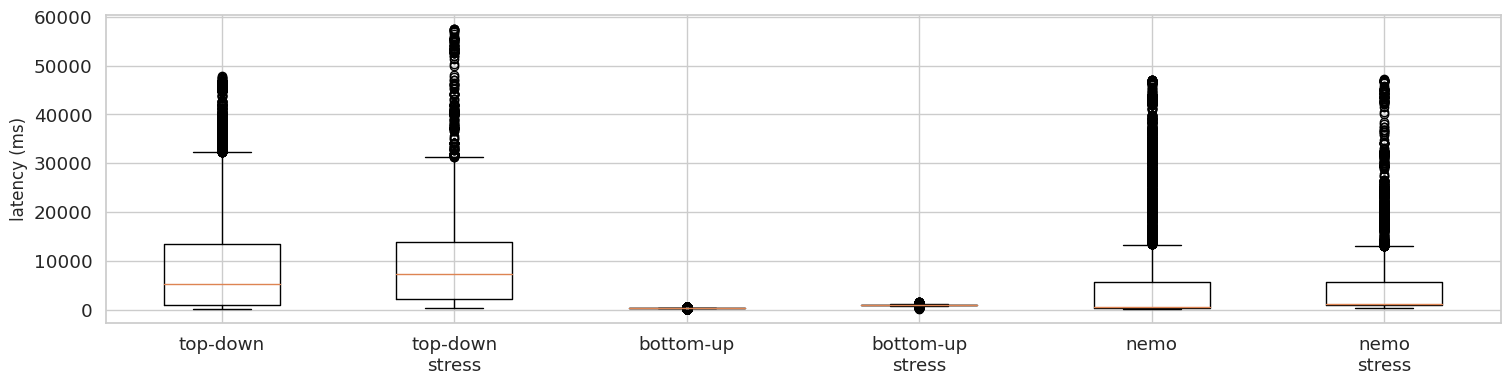

In [31]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(18, 4))

# Extract the keys and values from the measurements dictionary
labels = latency_results.keys()
values = latency_results.values()

# Create the box plots for each key-value pair
ax.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax.set_xticklabels(formatted_labels)

# Set the title
plt.ylabel('latency (ms)', fontsize=12)

plt.savefig("plots/NES/latency_boxplot.svg", bbox_inches = "tight")

# Display the plot
# plt.title("Latency (wait_time={0}ms)".format(waitTime))
plt.show()

In [32]:
percentiles = [85, 90, 95, 99]
approaches = []
values = []
perc_label = []

for k, v in latency_results.items():
    #if "top-down" in k:
    #    continue
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        approaches.append(k)
        values.append(perc)
        perc_label.append(pval)

df_dict = dict(approach=approaches, value=values, percentile=perc_label)
df = pd.DataFrame(df_dict)

In [33]:
df

,approach,value,percentile
0,top-down,22277.60,85
1,top-down,29049.40,90
2,top-down,35853.00,95
3,top-down,44952.42,99
4,top-down stress,19400.30,85
5,top-down stress,23326.80,90
6,top-down stress,34110.25,95
7,top-down stress,53882.54,99
8,bottom-up,400.00,85
9,bottom-up,405.00,90


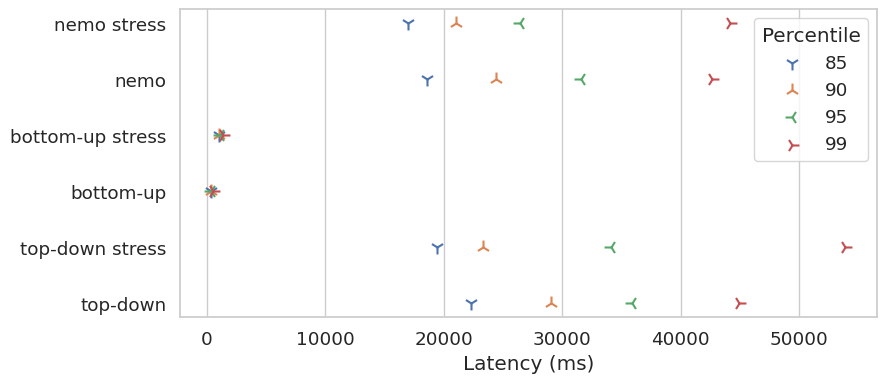

In [34]:
# Create the dot plot using matplotlib
fig, ax = plt.subplots(figsize=(9, 4))
color_list = sns.color_palette(n_colors=len(percentiles))
i = 0
for perc in percentiles:
    mask = df["percentile"] == perc
    ax.scatter(df.loc[mask, "value"], df.loc[mask, "approach"], color=color_list[i], label=str(perc), marker=str(i+1), s=100)
    i = i + 1

ax.set_xlabel("Latency (ms)")
ax.legend(title="Percentile")
ax.grid(axis='y')

plt.show()

In [35]:
percentiles = [85, 90, 95, 99]
value_dict = {}

for k, v in latency_results.items():
    values = []
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        values.append(perc)
    value_dict[k] = values

df = pd.DataFrame.from_dict(value_dict, columns=percentiles, orient='index').astype(int)
df

,85,90,95,99
top-down,22277,29049,35853,44952
top-down stress,19400,23326,34110,53882
bottom-up,400,405,412,553
bottom-up stress,1029,1057,1123,1397
nemo,18637,24424,31598,42673
nemo stress,16975,21040,26437,44140


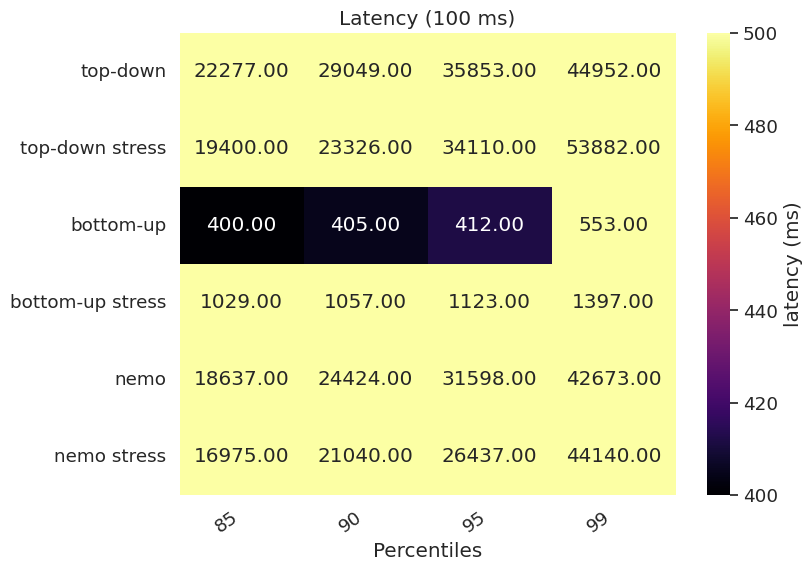

In [36]:
# create the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='inferno', vmax=500, cbar_kws={'label': 'latency (ms)'}, cbar=True, fmt='.2f')

# Rotate xtick labels
plt.xticks(rotation=35, ha='right')
plt.xlabel("Percentiles")
# show the plot
plt.savefig("plots/NES/latency_heatmap_perc.svg", bbox_inches='tight')
plt.title("Latency ({0} ms)".format(waitTime))
plt.show()